# HW03: Distance and Topic Model

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

## Load and Pre-process Text

In [1]:
from bugs import *

In [55]:
#Import the AG news dataset (same as hw01)
#Download them from here 
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import nltk
df = pd.read_csv('train.zip', names=["label", "title", "lead"]).assign(text="")

df.label = df.label.map({1: "world", 2: "sport", 3: "business", 4: "sci/tech"}) 

df.text = (df.title + " " + df.lead).str.replace("\\", " ", regex=False)

df.head()

,label,title,lead,text
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

print(list(nlp(first(df.text)).sents))

[Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.]


In [4]:
# Subsample corpus texts

dfs = df.iloc[0:200]  #.sample(200, random_state=1)
dfs.head()

,label,title,lead,text
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [54]:

# Tokenize documents

def tokenize(text: str):
    return ' '.join(
        t.text.lower() 
        for t in nlp(text)
        if not (t.is_digit or t.is_punct)
    )

dfs = dfs.assign(words=dfs.text.apply(tokenize))

dfs.words.head()

0    wall st. bears claw back into the black reuter...
1    carlyle looks toward commercial aerospace reut...
2    oil and economy cloud stocks outlook reuters r...
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to all time record posing new ...
Name: words, dtype: object

In [6]:

from sklearn.feature_extraction.text import CountVectorizer

## vectorize the pre-processed text using CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(dfs.words)

assert (X.shape == (len(dfs), X.shape[1]))

cv_words = cv.get_feature_names()

## Cosine Similarity and PCA

In [7]:
## compute the cosine similarity for the first 200 snippets and for the first snippet, show the three most similar snippets and their respective cosine similarity scores

from sklearn.metrics.pairwise import cosine_similarity

sep = "\n => "

print("Candidate:", first(dfs.text), sep=sep)

# Indices of most similar documents
cs = cosine_similarity(X, X)[0, :]
ii = np.argsort(-cs)[0:4]

print("Cosine similarities:", cs[ii], sep=sep)
print("Most similar snippets:", *dfs.text.iloc[ii][1:4], sep=sep)

Candidate:
 => Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.
Cosine similarities:
 => [1.         0.9435642  0.27050089 0.26057865]
Most similar snippets:
 => Wall St. Bears Claw Back Into the Black  NEW YORK (Reuters) - Short-sellers, Wall Street's dwindling  band of ultra-cynics, are seeing green again.
 => Dolphins Too Have Born Socialites (Reuters) Reuters - Some people are born to be the life and soul of the party -- and so it seems are some dolphins.
 => Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.


In [11]:

## reduce the vectorized data using PCA
## compute again cosine similarity with the reduced version for the first 200 snippets
## for the first snippet, show again its three most similar snippets

from sklearn.decomposition import PCA
pca = PCA(n_components=3, svd_solver='randomized')

x = pca.fit_transform(X.todense())

from sklearn.metrics.pairwise import cosine_similarity

sep = "\n => "

print("Candidate:", first(dfs.text), sep=sep)

# Indices of most similar documents
cs = cosine_similarity(x, x)[0, :]
ii = np.argsort(-cs)[0:4]

print("Cosine similarities:", cs[ii], sep=sep)
print("Most similar snippets:", *dfs.text.iloc[ii][1:4], sep=sep)

Candidate:
 => Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.
Cosine similarities:
 => [1.         0.99950188 0.99375414 0.99192155]
Most similar snippets:
 => Wall St. Bears Claw Back Into the Black  NEW YORK (Reuters) - Short-sellers, Wall Street's dwindling  band of ultra-cynics, are seeing green again.
 => Switching Titles, if Not Gears, at Dell Kevin B. Rollins, the new chief executive of Dell, talks about Dell's transitory slip in customer service, and why he sees a broader technology recovery taking place.
 => Russian Cargo Craft Docks at Space Station (AP) AP - A Russian cargo ship docked with the international space station Saturday, bringing food, water, fuel and other items to the two-man Russian-American crew, a space official said.


Compare the cosine similarity before and after PCA reduction. Did the results change? 

--

The results changed, but one document remained most "similar".

## Clustering

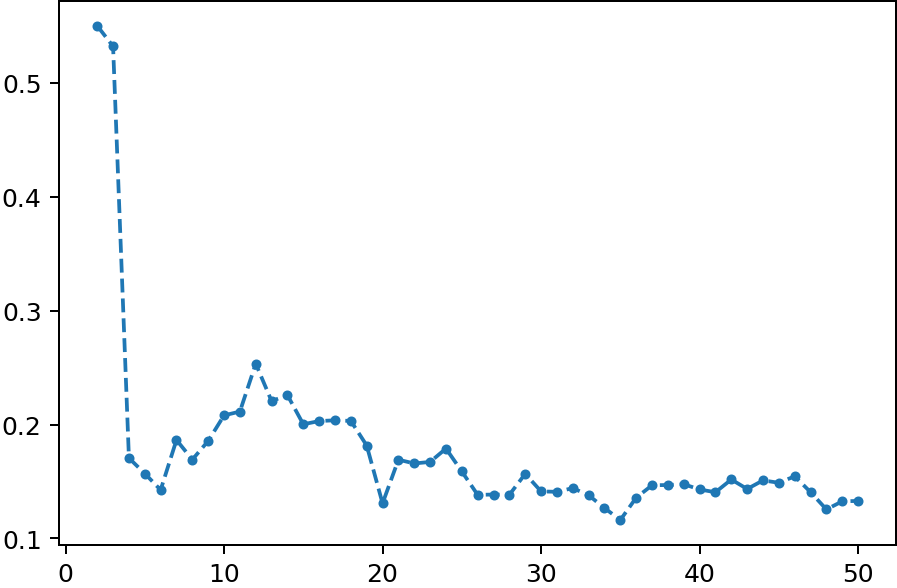

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Let's pre-PCA for clustering
x = PCA(n_components=13, svd_solver='randomized').fit_transform(X.todense())

# Doesn't seem to change the location of the peak though

## create the clusters found with k-means clustering and 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(x)
assert (kmeans.cluster_centers_.shape == (10, x.shape[1]))

## find the optimal number of clusters in a range from 2 to 50 using the silhouette score
scores = pd.Series({
    k: silhouette_score(x, KMeans(n_clusters=k, random_state=1).fit_predict(x))
    for k in range(2, 51)
})

with Plox() as px:
    px.a.plot(scores.index, scores, ".--")
    px.show()

In [13]:
## create the clusters using the optimal number of clusters obtained before
## compare the documents in cluster "1" under the two specifications, does the cluster look cleaner after having searched for the optimal number of clusters?

from collections import Counter

# The optimal number of clusters seems to be 2
# Perhaps we could also go with ~15
dfs = dfs.assign(kk=(KMeans(n_clusters=2, random_state=1).fit_predict(x)))

# The first cluster is:
clusterA = dict(list(dfs.text.groupby(dfs.kk))).get(first(dfs.kk))
print(f"clusterA has size {len(clusterA)}")

print("clusterA preview: ", *clusterA.head(), sep="\n o) ")

print("")

# Try 10 clusters again
dfs = dfs.assign(kk=(KMeans(n_clusters=10, random_state=1).fit_predict(x)))

# The clusters are:
clusterB = dict(list(dfs.text.groupby(dfs.kk))).get(first(dfs.kk))
print(f"clusterB has size {len(clusterB)}")

print("clusterB preview: ", *clusterB.head(), sep="\n o) ")

print("")

print("Some documents in clusterA but not in clusterB:", *(clusterA[~clusterA.index.isin(clusterB.index)]).head(), sep="\n o) ")


clusterA has size 176
clusterA preview: 
 o) Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.
 o) Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group, which has a reputation for making well-timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market.
 o) Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.
 o) Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export flows from the main pipeline in southern Iraq after intelligence showed a rebel militia could strike infrastructure, an oil official said on Saturday.
 o) Oil prices soar to all-time record, p

## Topic Modeling: LDA

For this part you will need to use LDA Mallet. If you cannot have Mallet run, you can use the simple LDA algorithm 

In [14]:
## create a dictionary with the pre-processed tokenized text and filter it according to frequencies and keeping 1000 vocabularies
## create the doc_term_matrix

from gensim.corpora import Dictionary

def tokenize(text: str):
    return list(
        t.text.lower() 
        for t in nlp(text)
        if not (t.is_digit or t.is_punct)
    )

corpus = list(dfs.text.apply(tokenize))

dct = Dictionary(corpus)
dct.filter_extremes(keep_n=1000)

# doc-term matrix: remove idf 
# https://radimrehurek.com/gensim/models/tfidfmodel.html
from gensim.models.tfidfmodel import TfidfModel
M = TfidfModel([dct.doc2bow(text) for text in corpus], wglobal=(lambda x, y: 1))

# For the following, this is more useful
M = [dct.doc2bow(text) for text in corpus]

In [15]:
## train a LDA Mallet model with 5, 10 and 15 topics
## compute the coherence score for each of these model and print the topics from the model with highest coherence score

from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

from gensim.test.utils import common_corpus, common_dictionary

# https://radimrehurek.com/gensim/models/wrappers/ldamallet.html
ldas = {
    n: LdaMallet('/home/ra/Downloads/mallet-2.0.8/bin/mallet', corpus=M, num_topics=n, id2word=dct)
    for n in [5, 10, 15]
}



In [16]:
(score, n) = max((CoherenceModel(ldas[n], corpus=M, coherence='u_mass').get_coherence(), n) for n in ldas)
print(f"score: {score}, n: {n}")

print("Topics:", *ldas[n].print_topics(), sep='\n')

score: -15.018224345236687, n: 15
Topics:
(0, '0.197*"google" + 0.136*"public" + 0.106*"search" + 0.106*"called" + 0.091*"york" + 0.091*"open" + 0.091*"ipo" + 0.076*"\'ve" + 0.045*"good" + 0.030*"number"')
(1, '0.233*"scientists" + 0.192*"\'s" + 0.137*"saudi" + 0.110*"bush" + 0.096*"government" + 0.096*"computer" + 0.082*"offer" + 0.055*"number" + 0.000*"so" + 0.000*"like"')
(2, '0.364*"ap" + 0.117*"found" + 0.104*"growth" + 0.091*"reported" + 0.078*"long" + 0.078*"uk" + 0.052*"show" + 0.052*"years" + 0.052*"state" + 0.013*"country"')
(3, '0.361*"\'s" + 0.153*"technology" + 0.139*"code" + 0.083*"working" + 0.069*"reason" + 0.069*"stock" + 0.056*"central" + 0.028*"wednesday" + 0.014*"company" + 0.014*"year"')
(4, '0.404*"space.com" + 0.191*"space" + 0.112*"nasa" + 0.090*"earth" + 0.056*"planet" + 0.056*"mission" + 0.045*"state" + 0.022*"black" + 0.011*"based" + 0.011*"service"')
(5, '0.408*"\'s" + 0.211*"year" + 0.099*"life" + 0.085*"latest" + 0.070*"based" + 0.042*"money" + 0.028*"data

In [17]:
import pyLDAvis.gensim
## using LDAvis visualize the topics using the optimal number of topics

pyLDAvis.enable_notebook()

In [18]:
# No clue what's going on there

# https://stackoverflow.com/questions/50340657/pyldavis-with-mallet-lda-implementation-ldamallet-object-has-no-attribute-inf
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldas[n])

# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#13.-t-SNE-Clustering-Chart
pyLDAvis.gensim.prepare(model, M, dictionary=model.id2word)


/home/ra/repos/legal_dna/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: unhashable type: 'Int64Index'